In [1]:
from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
os.getcwd()

'C:\\Users\\DELL-PC\\Desktop\\exam\\stock-time-series-20050101-to-20171231 (1)'

# 1) Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file.

To create csv files first i have loaded two files 'all_stocks_2017-01-01_to_2018-01-01.csv' and'all_stocks_2006-01-01_to_2018-01-01.csv' with the variable name all_stocks and all_stocks1 after that created empty list called name_list to get variable name of csv files for that i run for loop on all_stocks's column 'Name' and appended unique names in name_list. to get unique name used if condition in name_list after that for creating csv files again run for loop on name_list and also set 'Date' column as index and covert Date column into Datetime using 'parse_dates'. 


In [3]:
all_stocks = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])
all_stocks1 = pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])
name_list = []
for i in all_stocks.Name:
    if i not in name_list:
        name_list.append(i)
for i in name_list:
    vars()[i] = pd.read_csv('{}_2006-01-01_to_2018-01-01.csv'.format(i),parse_dates=['Date'],index_col='Date')


In [4]:
MMM.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


# 2) Perform Exploratory data analysis and data visualization for different time periods using given stock dataset

To analysis on diffrent time periods sliced  all_stock data into three parts 

After that from all_stock data applying condition on name columns get the data of apple for this three time periods and created line graph for open value for all time periods.

To Calculate return on Open value divide every value by first value of Open column and for that used lambda function to divide evry value for all three time periods.if we invest 1000 dollar for each 3 time  than for first time period we can get around 3000 dollar , for second around 2600 dollar and for third aroud 2200 dollar

created graph for Open columns for all stocks for all 3 time periods using groupby on Name columns 

In [5]:
all_stocks.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [6]:
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [7]:
all_stocks.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [8]:
# Fill null values using ffil methord

In [9]:
all_stocks = all_stocks.fillna(method='ffill')

In [10]:
all_stocks.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [11]:
k1 =  all_stocks['2006-01-03':'2009-12-31']
k2 =  all_stocks['2010-01-03':'2013-12-31']
k3 =  all_stocks['2014-01-03':'2017-12-29']

[]

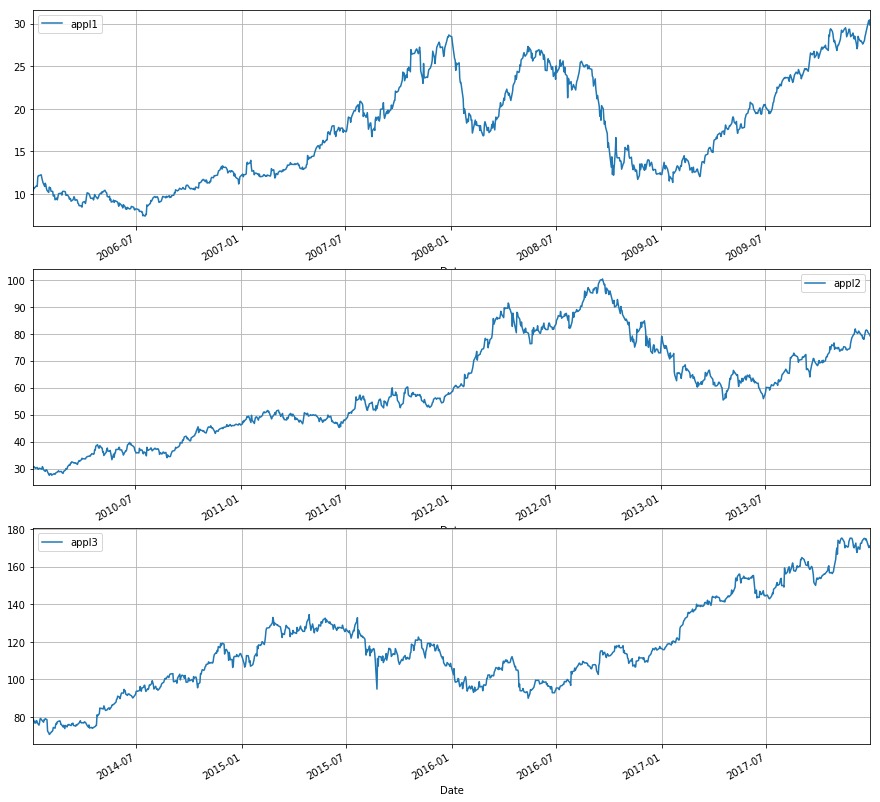

In [12]:
plt.subplot(3,1,1)
apple = k1[k1['Name']=='AAPL']
apple.Open.rename('appl1').plot(grid = True,legend = True,figsize=(15,15))


plt.subplot(3,1,2)
apple2 = k2[k2['Name']=='AAPL']
apple2.Open.rename('appl2').plot(grid = True,legend = True,figsize=(15,15))

plt.subplot(3,1,3)
apple3 = k3[k3['Name']=='AAPL']
apple3.Open.rename('appl3').plot(grid = True,legend = True,figsize=(15,15))

plt.plot()

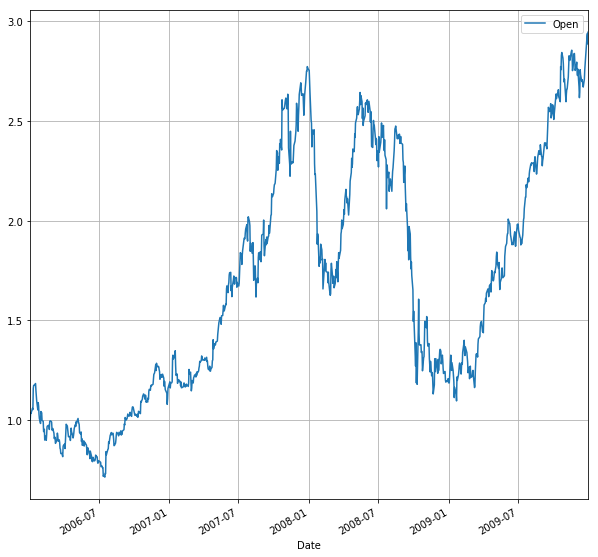

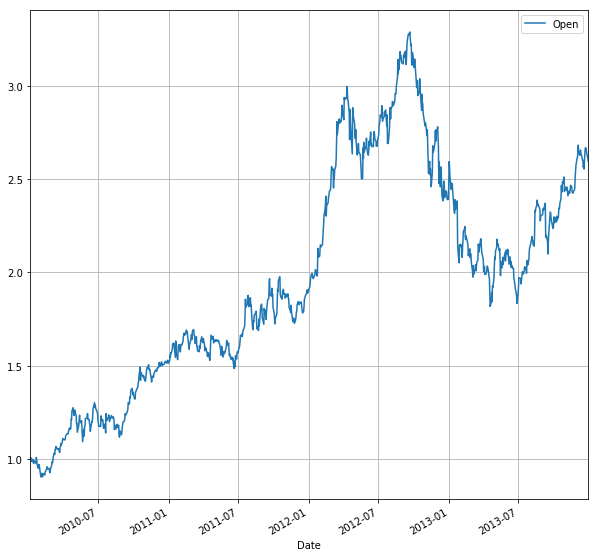

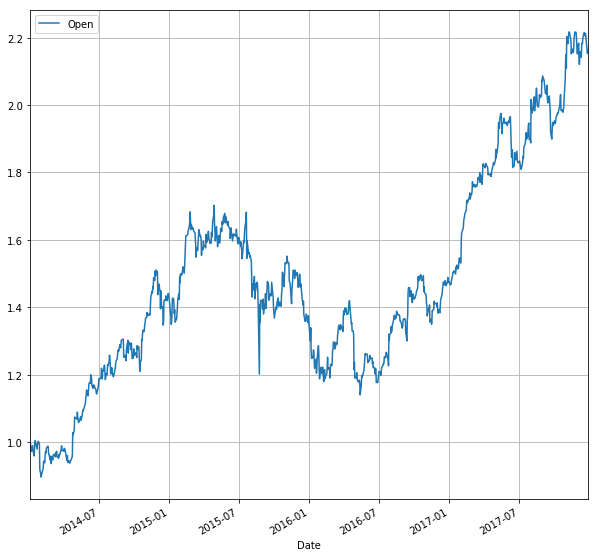

In [13]:

a = pd.DataFrame(apple['Open'])
a.apply(lambda x: x / x[0]).plot(grid = True,legend = True,figsize=(10,10))
plt.show()



a2 = pd.DataFrame(apple2['Open'])
a2.apply(lambda x: x / x[0]).plot(grid = True,legend = True,figsize=(10,10))
plt.show()


a3 = pd.DataFrame(apple3['Open'])
a3.apply(lambda x: x / x[0]).plot(grid = True,legend = True,figsize=(10,10))
plt.show()


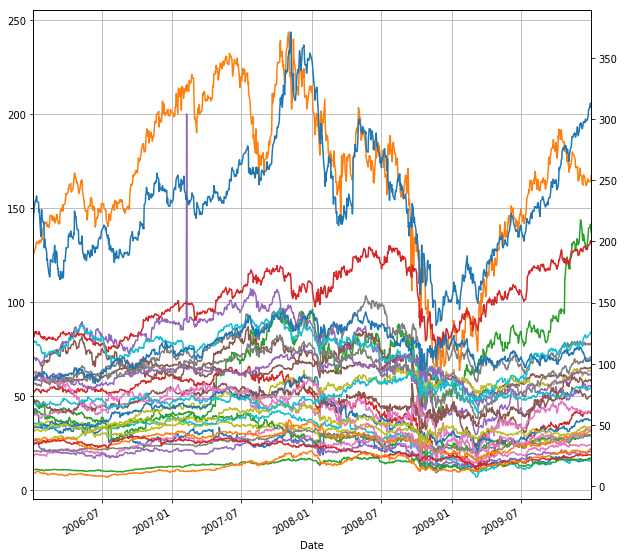

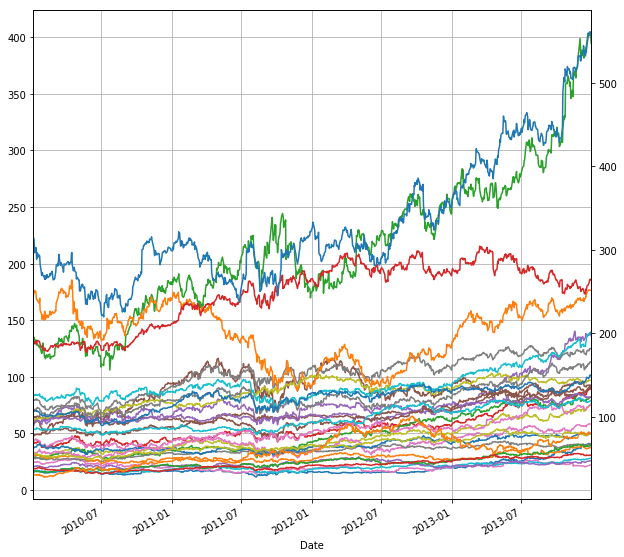

In [14]:
# legends are same for all three graphs
k1.groupby(['Name']).Open.plot(grid = True,figsize=(10,10),secondary_y = ["AAPL", "GOOGL"])
plt.show()

k2.groupby(['Name']).Open.plot(grid = True,figsize=(10,10),secondary_y = ["AAPL", "GOOGL"])
plt.show()




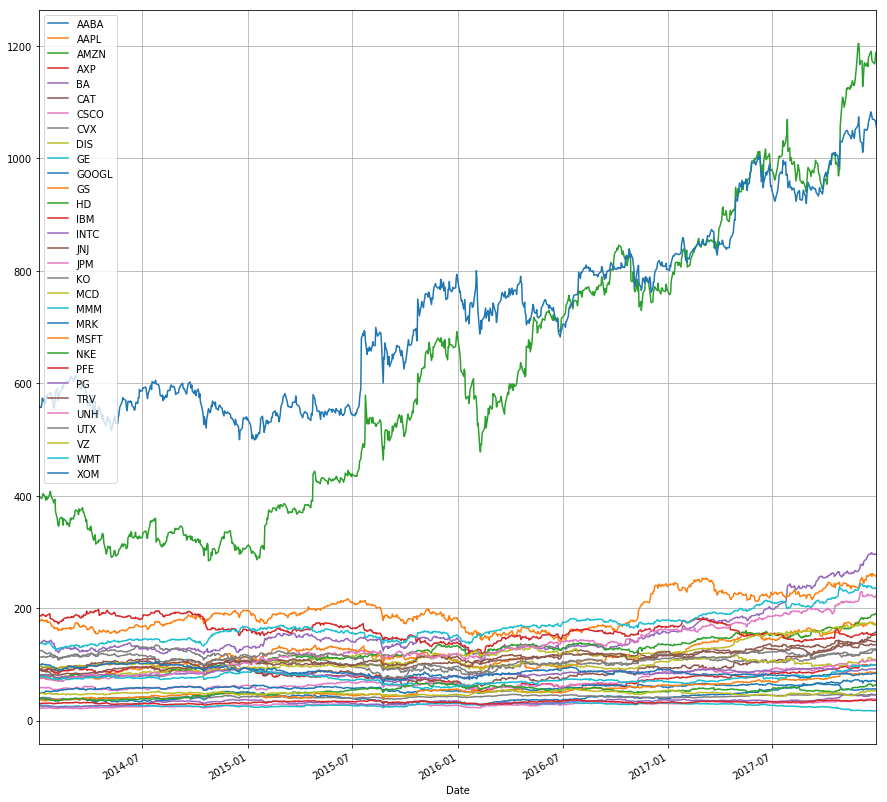

In [15]:
k3.groupby(['Name']).Open.plot(grid = True,figsize=(15,15),legend = True)
plt.show()

# 3) You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.


Here in this question  to analysis on top two pharmaceutical company whose tickers are MRK and PFE First i used isnull() methord to check null value and fill null value using forwardfill(ffil).to analyze descriptive statistics of both stocks used describe () methord and also plot bar chart for finding MAX.For that applied Condition on 'Name' Column and created DataFrame after that groupby this dataframe by Name column and get maximum value for 'Close' column using max().MRK's stock has maximum value which is almost double than PFE.and also find min using min()

To Compare both stocks every day close value plot line graph selected 'Close' column from both stocks and created DataFrame of this stocks using 'Close' Columns and after that plot This data where index is 'Date' column.From 2007 to 2008 MRK's close stock value is increasing where PFE's close stock value is decrising.

To find moving averages for Close column used Close_data on this DataFrame used pandas rolling function and plot graph for observation 20.here we can see same analysis as above i rulling average

To Compare everyday percentage change in 'Close' value of both stocks used pct_change() on both stocks's Close Column.MRK's stock has many time big percentage change as compare to PFE which we can see clearly around 2008.

In [16]:
print(MRK.head())
print(PFE.head())

             Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  32.52  32.87  31.81  32.75  11430600  MRK
2006-01-04  32.75  33.20  32.75  33.13  12530200  MRK
2006-01-05  32.92  33.39  32.50  33.18  15349900  MRK
2006-01-06  33.09  33.36  32.87  33.12   9302700  MRK
2006-01-09  33.22  33.66  32.75  33.66  14958400  MRK
             Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  23.65  23.92  23.60  23.78  38052400  PFE
2006-01-04  23.97  24.57  23.95  24.55  43972000  PFE
2006-01-05  24.55  24.75  24.44  24.58  42601900  PFE
2006-01-06  24.70  24.95  24.63  24.85  28523900  PFE
2006-01-09  24.98  24.99  24.52  24.85  28080300  PFE


In [17]:
print(MRK.isnull().sum())
print(PFE.isnull().sum())


Open      1
High      1
Low       0
Close     0
Volume    0
Name      0
dtype: int64
Open      1
High      1
Low       1
Close     0
Volume    0
Name      0
dtype: int64


In [18]:
MRK = MRK.fillna(method='ffill')
PFE = PFE.fillna(method='ffill')


In [19]:
MRK.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,45.584356,45.997420,45.168291,45.587705,1.325522e+07
std,11.239344,11.247165,11.220018,11.228724,7.338020e+06
min,20.150000,22.310000,20.050000,20.990000,6.393080e+05
25%,35.745000,36.065000,35.420000,35.775000,8.824002e+06
50%,44.550000,44.940000,44.230000,44.580000,1.154440e+07
75%,56.300000,56.720000,55.900000,56.250000,1.535846e+07
max,66.380000,66.800000,66.000000,66.580000,8.415181e+07


In [20]:
PFE.describe()

,Open,High,Low,Close,Volume
count,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03
mean,25.439874,25.657719,25.225798,25.442477,3.792700e+07
std,6.506919,6.519963,6.497193,6.511962,2.167209e+07
min,11.840000,12.170000,11.620000,11.660000,1.642256e+06
25%,19.430000,19.627500,19.240000,19.367500,2.398591e+07
50%,25.550000,25.780000,25.380000,25.610000,3.286740e+07
75%,31.340000,31.612500,31.060000,31.295000,4.602826e+07
max,37.220000,37.390000,37.060000,37.310000,2.893405e+08


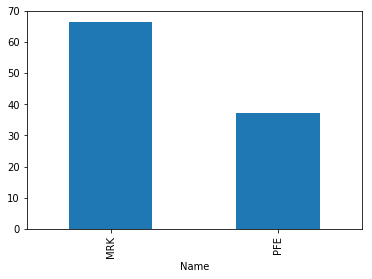

In [21]:
M_P = all_stocks[(all_stocks['Name']=='MRK') | (all_stocks['Name']=='PFE') ]
M_P.reset_index(inplace = True)
p = M_P.groupby(['Name']).Close.max()
p.plot.bar()


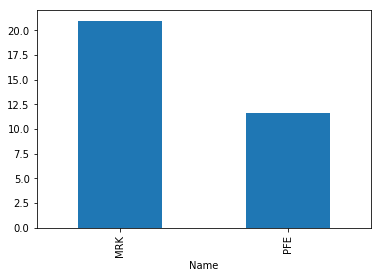

In [22]:
p1 = M_P.groupby(['Name']).Close.min()

p1.plot.bar()

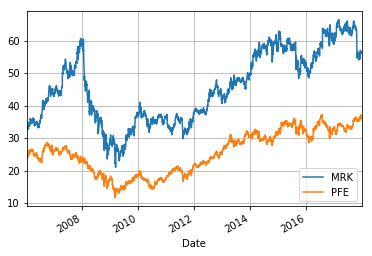

In [23]:
close_data =  pd.DataFrame({'MRK':MRK['Close'],
                       'PFE':PFE['Close']})
close_data.plot(grid = True)
plt.show()

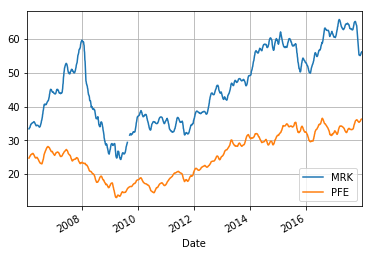

In [24]:
close_data.rolling(window = 20).mean().plot(grid=True)
plt.show()

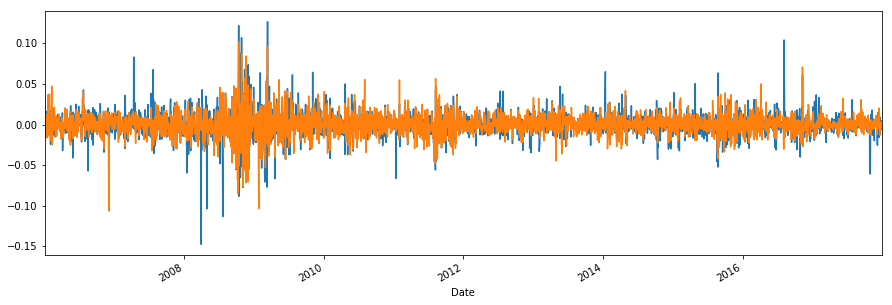

In [25]:
MRK.Close.pct_change().plot(figsize=(15,5))
PFE.Close.pct_change().plot(figsize=(15,5))

# 4)Take five stocks of your choice and create the same type of report stated in question 3

For Analyis of five Stock I took WMT,UNH,MSFT,JPM,KO and first filled null values. after that to analyze descriptive statistics used describe() methord and plot bar graph for maximum value of all 5 stocks.for plotting bar graph using condition on Name column of each stock,selected this five stocks from all_stocks data.after that used groupby() for grouping data using Name column and for 'Open' Column used max() to find maximum value.UNH has highest maximum value for evry column and also plot for min().

After that for visulize all 5 stocks every day open value plot line graph selected 'Open' column from all stocks and created DataFrame('Open_five') of this 5 'Open' Columns and after that plot This data where index is 'Date' column.From this graph we can see that UNH stock increase rapidly as comapre to other stocks from 2015

To find moving averages for Open column used Open_five on this DataFrame used pandas rolling function  and plot graph for observation 20.

To check everyday percentage change in 'Open' value plot the graph for that used Max_data which I got by applying condition on Name column.From Max_data created dataframes for Open column for this 5 stock data and used pct_change() function on datasets to calculate percentage change for every day.JPM,UNH has more percentage change around 2009.





In [26]:
# GOOGL and MSFT have no null values
WMT = WMT.fillna(method='ffill')
UNH = UNH.fillna(method='ffill')
KO  = KO.fillna(method='ffill')


In [27]:
Max_data = all_stocks[(all_stocks['Name']=='JPM') | (all_stocks['Name']=='KO') | (all_stocks['Name']=='MSFT') | (all_stocks['Name']=='UNH') | (all_stocks['Name']=='WMT')]
Max_data.reset_index(inplace = True)
print('WMT\n')
print(Max_data[(Max_data['Name']=='WMT')].describe())
print('\nUNH\n')
print(Max_data[(Max_data['Name']=='UNH')].describe())
print('\nMSFT\n')
print(Max_data[(Max_data['Name']=='MSFT')].describe())
print('\nJPM\n')
print(Max_data[(Max_data['Name']=='JPM')].describe())
print('\nKO\n')
print(Max_data[(Max_data['Name']=='KO')].describe())



WMT

              Open         High          Low        Close        Volume
count  3020.000000  3020.000000  3020.000000  3020.000000  3.020000e+03
mean     62.256338    62.735507    61.810967    62.280285  1.245873e+07
std      12.737052    12.760339    12.724222    12.747477  7.574560e+06
min      42.390000    42.680000    42.090000    42.270000  1.712675e+06
25%      50.800000    51.350000    50.337500    50.870000  7.099085e+06
50%      59.005000    59.535000    58.570000    59.030000  1.034737e+07
75%      73.802500    74.162500    73.375000    73.765000  1.563564e+07
max      99.910000   100.130000    99.120000    99.620000  9.283877e+07

UNH

              Open         High          Low        Close        Volume
count  3020.000000  3020.000000  3020.000000  3020.000000  3.020000e+03
mean     73.536500    74.261646    72.815311    73.568149  7.015843e+06
std      47.396305    47.640886    47.141311    47.422996  4.739674e+06
min      16.570000    17.200000    14.510000    16.30

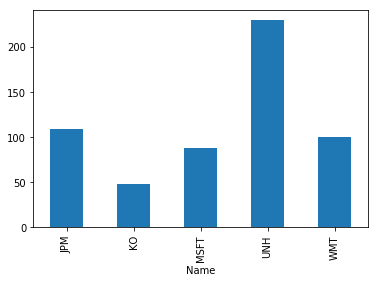

In [28]:

j = Max_data.groupby(['Name']).Open.max()
j.plot.bar()

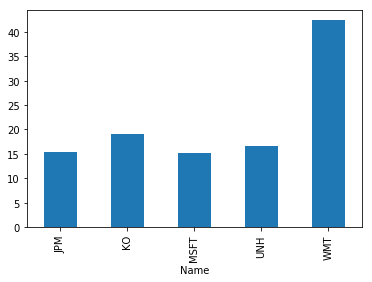

In [29]:
j = Max_data.groupby(['Name']).Open.min()
j.plot.bar()

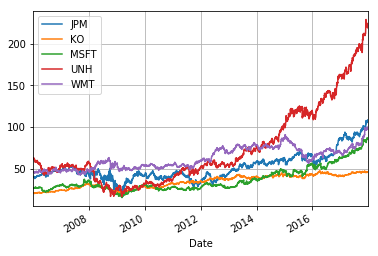

In [30]:
Open_five =  pd.DataFrame({'WMT': WMT['Open'],
                            'UNH': UNH['Open'],
                            'MSFT': MSFT['Open'],
                            'JPM': JPM['Open'],
                            'KO': KO['Open']
                           })
Open_five.plot(grid = True)
plt.show()

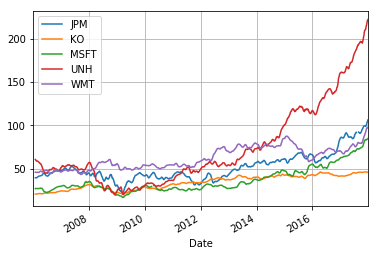

In [31]:
Open_five.rolling(window = 20).mean().plot(grid=True)
plt.show()

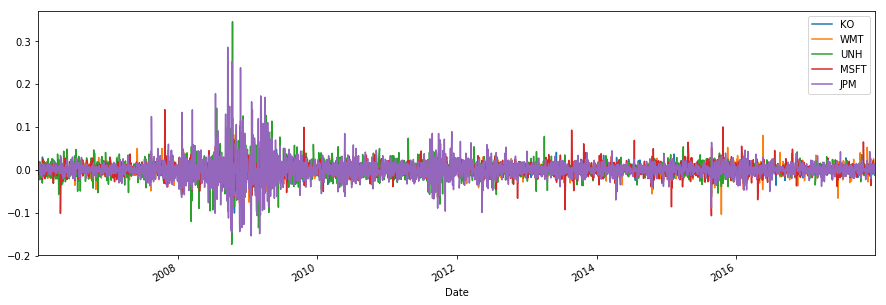

In [32]:
M = Max_data[Max_data['Name']=='KO'].set_index('Date')
M.Open.rename('KO').pct_change().plot(figsize=(15,5),legend = True)

M2 = Max_data[Max_data['Name']=='WMT'].set_index('Date')
M2.Open.rename('WMT').pct_change().plot(figsize=(15,5),legend = True)

M3 = Max_data[Max_data['Name']=='UNH'].set_index('Date')
M3.Open.rename('UNH').pct_change().plot(figsize=(15,5),legend = True)

M4 = Max_data[Max_data['Name']=='MSFT'].set_index('Date')
M4.Open.rename('MSFT').pct_change().plot(figsize=(15,5),legend = True)

M5 = Max_data[Max_data['Name']=='JPM'].set_index('Date')
M5.Open.rename('JPM').pct_change().plot(figsize=(15,5),legend = True)
